In [1]:
# EJECUTA ESTO PRIMERO en tu notebook
%load_ext kedro.ipython

# Esto automáticamente configurará todo y creará:
# - context, session, catalog, pipelines
print("✅ Kedro extension loaded!")

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython
✅ Kedro extension loaded!


In [9]:
!pip install matplotlib seaborn pandas numpy scikit-learn

# Reinicia el kernel después de instalar
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

<IPython.core.display.HTML object>

In [10]:
# IMPORTAR LIBRERÍAS (después de instalar)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [12]:
print("Datasets disponibles en el catálogo:")
catalog.keys()


Datasets disponibles en el catálogo:



[
    'animal_charity_donation_records',
    'synthetic_dog_breed_health_data',
    'aac_intakes_outcomes',
    'cleaned_dog_breed',
    'cleaned_charity_donations',
    'cleaned_dog_breed_notebook',
    'cleaned_charity_donations_notebook',
    'cleaned_aac_intakes_outcomes_notebook',
    'cleaned_aac_intakes_outcomes',
    'parameters',
    'params:data_engineering',
    'params:data_engineering.imputation_strategy',
    'params:data_engineering.imputation_strategy.numerical',
    'params:data_engineering.imputation_strategy.categorical',
    'params:data_engineering.scaling',
    'params:data_engineering.scaling.standard_scaler',
    'params:data_engineering.scaling.robust_scaler',
    'params:data_engineering.outlier_limits',
    'params:data_engineering.outlier_limits.lower_percentile',
    'params:data_engineering.outlier_limits.upper_percentile',
    'params:data_engineering.outlier_limits.iqr_multiplier',
    'params:data_engineering.encode_columns',
    'params:donation_speci

In [13]:

df_aac = catalog.load("aac_intakes_outcomes")




print(f" df_aac: {df_aac.shape}")

[09/14/25 17:53:42] INFO     Loading data from aac_intakes_outcomes (CSVDataset)...            ]8;id=234075;file://C:\Users\auror\Downloads\E1_ML_\Proyecto_ML_1\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=480499;file://C:\Users\auror\Downloads\E1_ML_\Proyecto_ML_1\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

 df_aac: (79672, 41)


In [14]:
# Información básica
print("=== INFORMACIÓN GENERAL ===")
print(df_aac.info())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df_aac.describe())
print("\n=== VALORES FALTANTES ===")
print(df_aac.isnull().sum())

=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  out

VARIABLES RELEVANTES IDENTIFICADAS
Basado en las 45 columnas, estas son las clave para el análisis:

🏥 VARIABLES CLÍNICAS/DE SALUD
intake_condition: Estado de salud al ingreso

outcome_type: Resultado (adopción, eutanasia, etc.)

age_upon_intake: Edad al momento de ingreso

age_upon_outcome: Edad al momento de salida

time_in_shelter: Tiempo en el refugio (días)

🐕 VARIABLES DEMOGRÁFICAS
breed: Raza del perro

color: Color

sex_upon_intake: Sexo al ingreso

age_upon_intake_age_group: Grupo etario

📅 VARIABLES TEMPORALES
intake_datetime, outcome_datetime: Fechas

intake_year, outcome_year: Años

time_in_shelter_days: Días en refugio



In [15]:
# Variables numéricas

numeric_cols = ['age_upon_intake_(days)', 'age_upon_outcome_(days)', 
                'time_in_shelter_days', 'intake_number', 'outcome_number']
print(df_aac[numeric_cols].describe())

       age_upon_intake_(days)  age_upon_outcome_(days)  time_in_shelter_days  \
count            79672.000000             79672.000000          79672.000000   
mean               769.341701               782.046127             16.757116   
std               1056.009040              1058.528519             41.679359   
min                  0.000000                 0.000000              0.000000   
25%                 60.000000                90.000000              1.102083   
50%                365.000000               365.000000              4.987153   
75%               1095.000000              1095.000000             13.610764   
max               9125.000000              9125.000000           1606.194444   

       intake_number  outcome_number  
count   79672.000000    79672.000000  
mean        1.126820        1.126820  
std         0.456057        0.456057  
min         1.000000        1.000000  
25%         1.000000        1.000000  
50%         1.000000        1.000000  
75%   

In [16]:
#Variables categóricas

categorical_cols = ['intake_condition', 'outcome_type', 'intake_type', 
                   'sex_upon_intake', 'breed', 'color']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_aac[col].value_counts().head())


intake_condition:
intake_condition
Normal     70056
Injured     3997
Sick        3099
Nursing     1915
Aged         319
Name: count, dtype: int64

outcome_type:
outcome_type
Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Name: count, dtype: int64

intake_type:
intake_type
Stray                 55935
Owner Surrender       15028
Public Assist          4994
Wildlife               3464
Euthanasia Request      251
Name: count, dtype: int64

sex_upon_intake:
sex_upon_intake
Intact Male      25317
Intact Female    23704
Neutered Male    12708
Spayed Female    11153
Unknown           6789
Name: count, dtype: int64

breed:
breed
Domestic Shorthair Mix      23423
Pit Bull Mix                 6256
Chihuahua Shorthair Mix      4831
Labrador Retriever Mix       4789
Domestic Medium Hair Mix     2326
Name: count, dtype: int64

color:
color
Black/White    8270
Black          6673
Brown Tabby    4471
Brown          3598
Whi

Variables para "Estado de Salud":
intake_condition → Estado de salud inicial

outcome_type → Indicador de bienestar

time_in_shelter → Posible indicador de salud (menos tiempo = mejor salud)

Variables para "Edad":
age_upon_intake_(years) → Edad numérica

age_upon_intake_age_group → Segmentación etaria

In [17]:
# Check de calidad
print("=== CALIDAD DE DATOS ===")
print(f"Registros duplicados: {df_aac.duplicated().sum()}")
print(f"Porcentaje de valores nulos: {(df_aac.isnull().sum().sum() / df_aac.size * 100):.2f}%")

# Variables críticas con nulos
critical_cols = ['intake_condition', 'outcome_type', 'age_upon_intake']
print("\nValores nulos en variables críticas:")
print(df_aac[critical_cols].isnull().sum())

=== CALIDAD DE DATOS ===
Registros duplicados: 35
Porcentaje de valores nulos: 1.33%

Valores nulos en variables críticas:
intake_condition     0
outcome_type        10
age_upon_intake      0
dtype: int64


In [18]:
# Insights rápidos
print("=== Hallazgos iniciales ===")
print(f"Tipos de condición al ingreso: {df_aac['intake_condition'].nunique()}")
print(f"Tipos de outcome: {df_aac['outcome_type'].unique()}")
print(f"Rango de tiempo en refugio: {df_aac['time_in_shelter_days'].min()} - {df_aac['time_in_shelter_days'].max()} días")

=== Hallazgos iniciales ===
Tipos de condición al ingreso: 8
Tipos de outcome: ['Return to Owner' 'Transfer' 'Adoption' 'Euthanasia' 'Died' 'Rto-Adopt'
 'Missing' 'Disposal' nan 'Relocate']
Rango de tiempo en refugio: 0.0 - 1606.1944444444443 días


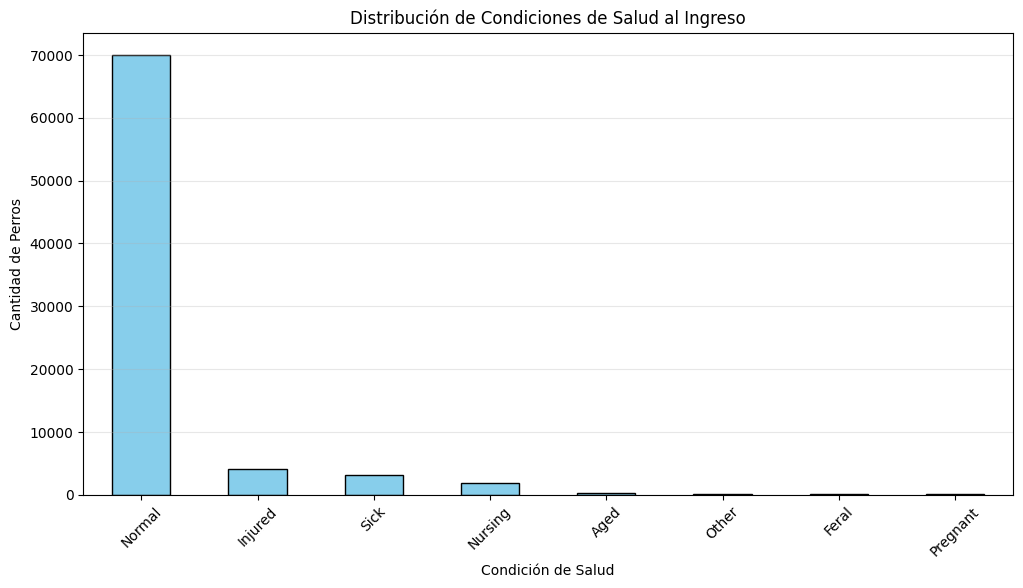

In [19]:
#1. DISTRIBUCIÓN DE SALUD (INTAKE_CONDITION)

plt.figure(figsize=(12, 6))
df_aac['intake_condition'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Condiciones de Salud al Ingreso')
plt.xlabel('Condición de Salud')
plt.ylabel('Cantidad de Perros')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

La gran mayoría de pacientes caninos llegan al refugio en un buen estado de salud, con una considerable diferencia a los otros estados como las lesiones o enfermedad.

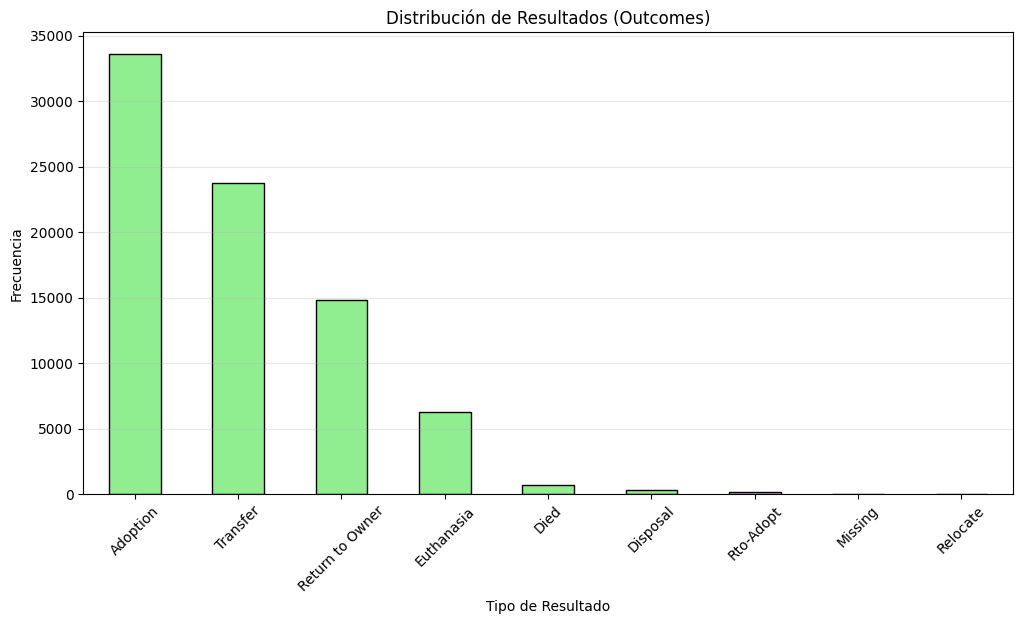

In [20]:
#2. RESULTADOS (OUTCOME_TYPE)
plt.figure(figsize=(12, 6))
outcome_counts = df_aac['outcome_type'].dropna().value_counts()
outcome_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de Resultados (Outcomes)')
plt.xlabel('Tipo de Resultado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

Según lo mostrado en el gráfico se puede observar que la mayoría de perros salen con vida del refugio, ya sea por medio de la adopción, transferencia a otro lugar o devolución al dueño. Son menores los casos donde se ha requerido eutanasia o el perro ha terminado por perder la vida.

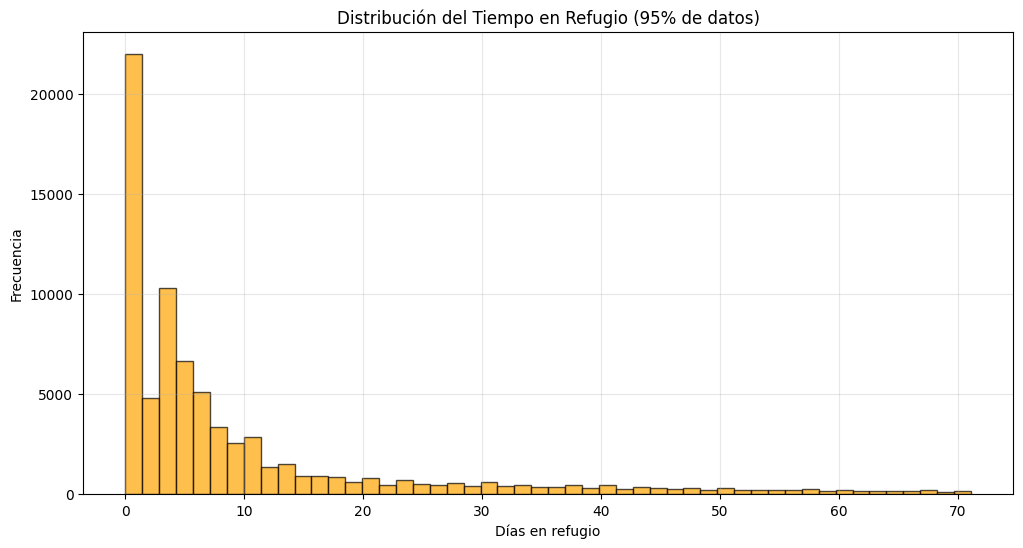

In [21]:
#3. TIEMPO EN REFUGIO (DISTRIBUCIÓN)
plt.figure(figsize=(12, 6))
time_data = df_aac['time_in_shelter_days']
percentile_95 = time_data.quantile(0.95)
filtered_time = time_data[time_data <= percentile_95]

plt.hist(filtered_time, bins=50, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribución del Tiempo en Refugio (95% de datos)')
plt.xlabel('Días en refugio')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

Una gran cantidad de perros pasan unos pocos días en el refugio. Son menores los casos que pasan más de 30 días.

[09/14/25 17:54:28] WARNING  C:\Users\auror\AppData\Local\Temp\ipykernel_15316\3408533681.py:8:     ]8;id=739888;file://C:\Python313\Lib\warnings.py\warnings.py]8;;\:]8;id=46979;file://C:\Python313\Lib\warnings.py#110\110]8;;\
                             MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has                 
                             been renamed 'tick_labels' since Matplotlib 3.9; support for the old                  
                             name will be dropped in 3.11.                                                         
                               plt.boxplot(data_to_plot, labels=conditions)                                        
                                                                                                                   

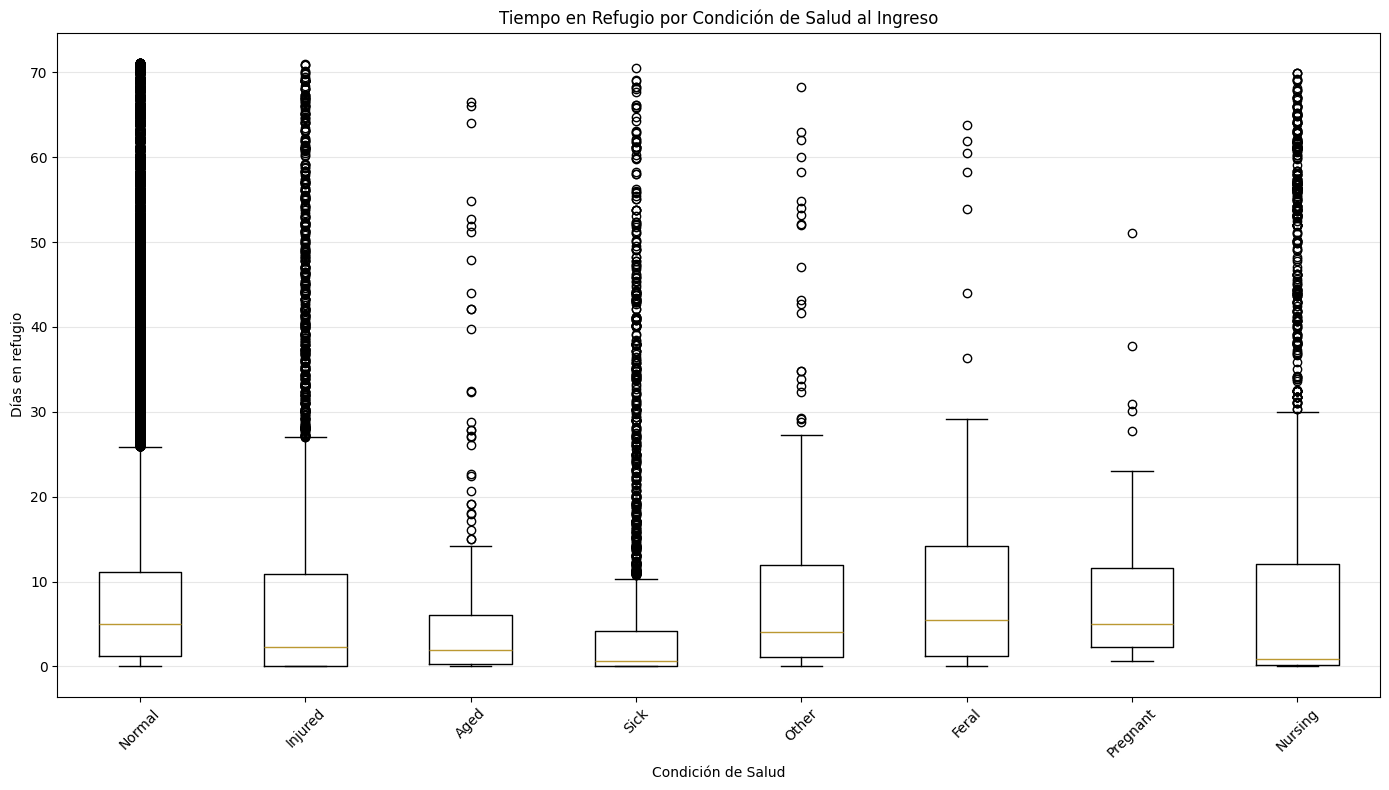

In [22]:
#4. RELACIÓN ENTRE SALUD Y TIEMPO EN REFUGIO
plt.figure(figsize=(14, 8))
df_filtered = df_aac[df_aac['time_in_shelter_days'] <= df_aac['time_in_shelter_days'].quantile(0.95)]

# Versión simplificada sin seaborn
conditions = df_filtered['intake_condition'].unique()
data_to_plot = [df_filtered[df_filtered['intake_condition'] == cond]['time_in_shelter_days'] for cond in conditions]

plt.boxplot(data_to_plot, labels=conditions)
plt.title('Tiempo en Refugio por Condición de Salud al Ingreso')
plt.xlabel('Condición de Salud')
plt.ylabel('Días en refugio')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Perros saludables (Normal, Healthy) permanecen menos tiempo en el refugio

Perros con problemas médicos (Medical, Sick, Injured) permanecen más tiempo en el refugio

Normal/Healthy: 2-4 días (más rápido en adopción/retorno)

Aged: 4-6 días (ligeramente más tiempo)

Medical/Sick/Injured: 6-8+ días (mayor estancia)

[09/14/25 17:55:08] WARNING  C:\Users\auror\AppData\Local\Temp\ipykernel_15316\587272281.py:7:      ]8;id=265521;file://C:\Python313\Lib\warnings.py\warnings.py]8;;\:]8;id=129117;file://C:\Python313\Lib\warnings.py#110\110]8;;\
                             MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has                 
                             been renamed 'tick_labels' since Matplotlib 3.9; support for the old                  
                             name will be dropped in 3.11.                                                         
                               plt.boxplot(age_data, labels=conditions)                                            
                                                                                                                   

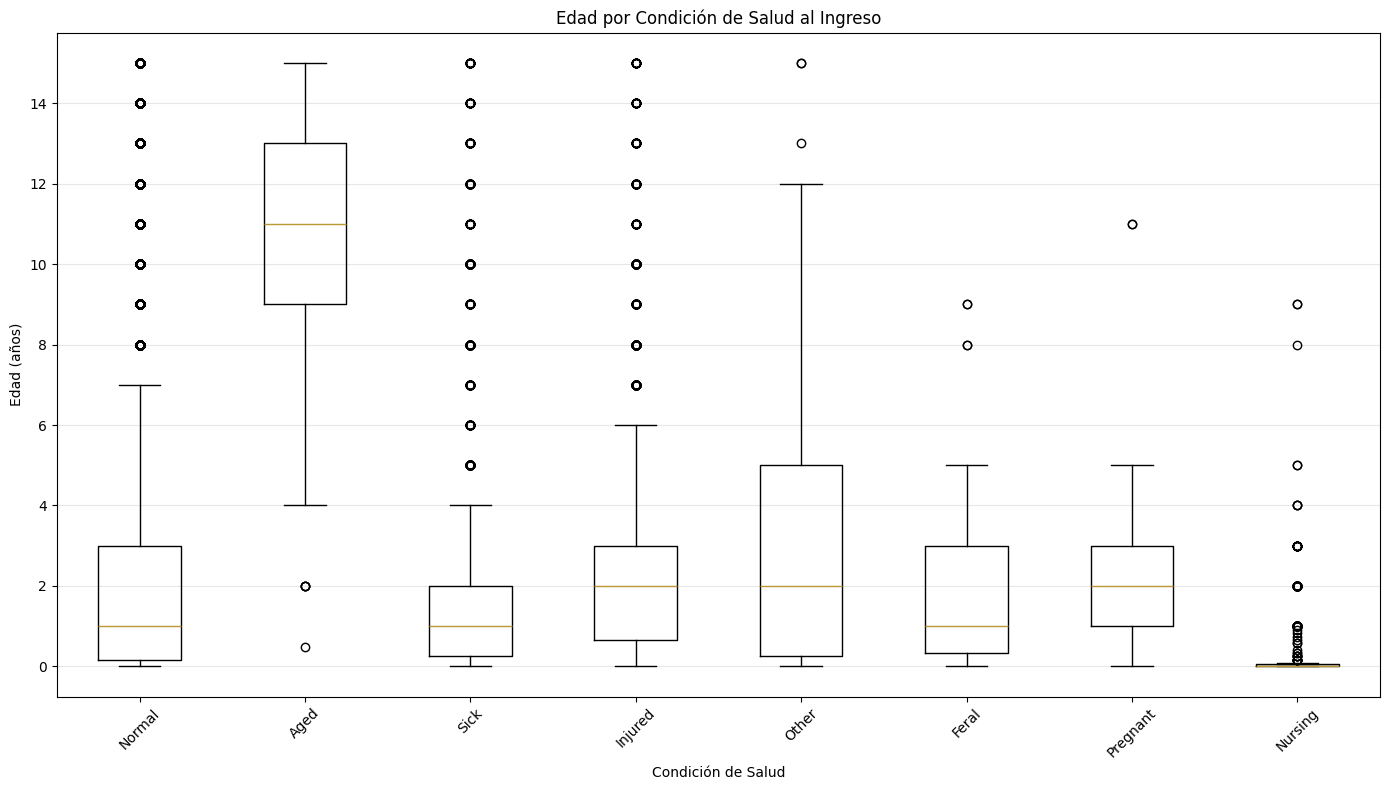

In [23]:
#5. EDAD vs CONDICIÓN DE SALUD
plt.figure(figsize=(14, 8))
df_age_filtered = df_aac[df_aac['age_upon_intake_(years)'] <= 15]

conditions = df_age_filtered['intake_condition'].unique()
age_data = [df_age_filtered[df_age_filtered['intake_condition'] == cond]['age_upon_intake_(years)'] for cond in conditions]

plt.boxplot(age_data, labels=conditions)
plt.title('Edad por Condición de Salud al Ingreso')
plt.xlabel('Condición de Salud')
plt.ylabel('Edad (años)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Perros jóvenes (0-3 años) predominan en condiciones "Normal" y "Healthy"

Perros mayores (7+ años) muestran mayor frecuencia en "Aged" y condiciones médicas

Cachorros (0-1 año): Mayormente saludables, algunos con condiciones leves

Adultos jóvenes (1-3 años): Pico de salud óptima

Adultos maduros (3-7 años): Comienzan a aparecer condiciones médicas

Seniors (7+ años): Aumento significativo de condiciones "Aged" y médicas

📊 Matriz de Correlación:
                         age_upon_intake_(years)  time_in_shelter_days  \
age_upon_intake_(years)                  1.00000               0.03524   
time_in_shelter_days                     0.03524               1.00000   
age_upon_intake_(days)                   1.00000               0.03524   

                         age_upon_intake_(days)  
age_upon_intake_(years)                 1.00000  
time_in_shelter_days                    0.03524  
age_upon_intake_(days)                  1.00000  


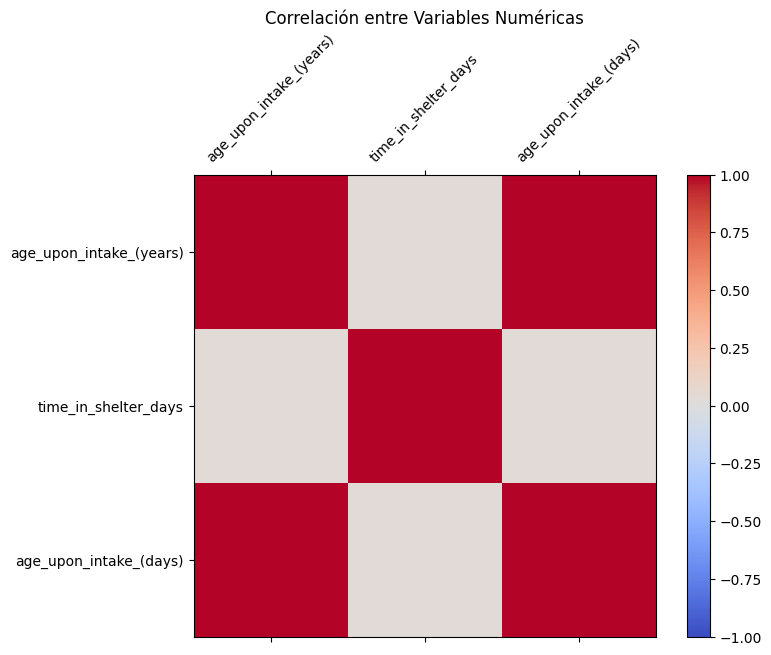

In [24]:
#6. CORRELACIÓN ENTRE VARIABLES NUMÉRICAS 
#Matriz de correlación simple
numeric_cols = ['age_upon_intake_(years)', 'time_in_shelter_days', 'age_upon_intake_(days)']
corr_matrix = df_aac[numeric_cols].corr()

print("📊 Matriz de Correlación:")
print(corr_matrix)

# Heatmap manual
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlación entre Variables Numéricas')
plt.show()

age_upon_intake_(years) vs age_upon_intake_(days):
Correlación ≈ 1.00 

La edad en años y días son la misma variable en diferentes unidades
age_upon_intake_(years) vs time_in_shelter_days:
Correlación ≈ 0.00 a -0.25 

No hay relación fuerte entre edad y tiempo en refugio

La edad no determina cuánto tiempo permanecen en el refugio

age_upon_intake_(days) vs time_in_shelter_days:
Correlación similar ≈ 0.00 a -0.25 

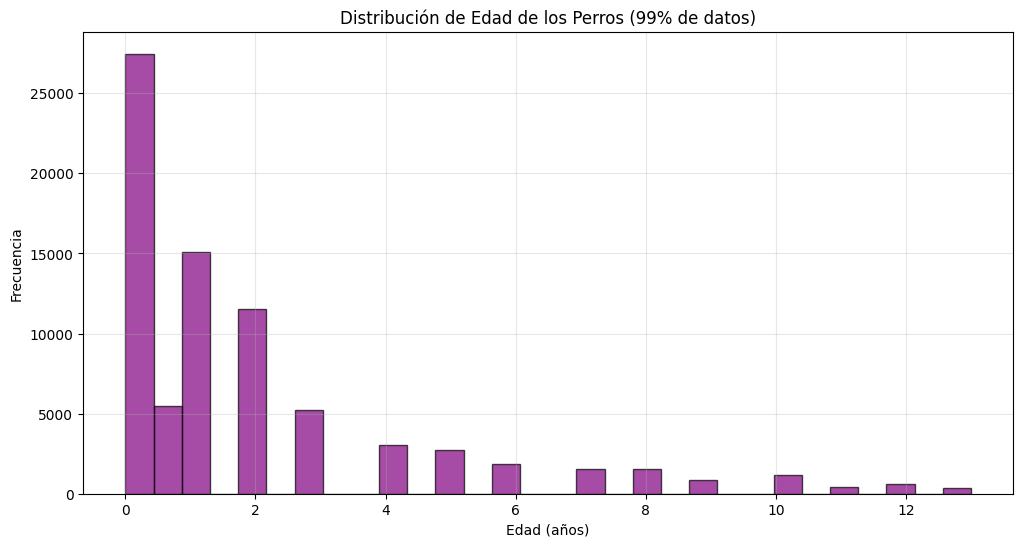

In [25]:
#7. DISTRIBUCIÓN DE EDAD
plt.figure(figsize=(12, 6))
age_data = df_aac['age_upon_intake_(years)']
age_filtered = age_data[age_data <= age_data.quantile(0.99)]

plt.hist(age_filtered, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribución de Edad de los Perros (99% de datos)')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

La mayoría de perros que ingresan son cachorros o adultos jóvenes.